In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import logging
import os
from datetime import datetime

In [2]:
dataset = pd.read_csv(r"C:\Users\aashutosh kumar\Music\cubic_zirconia.csv")
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


<Axes: xlabel='color'>

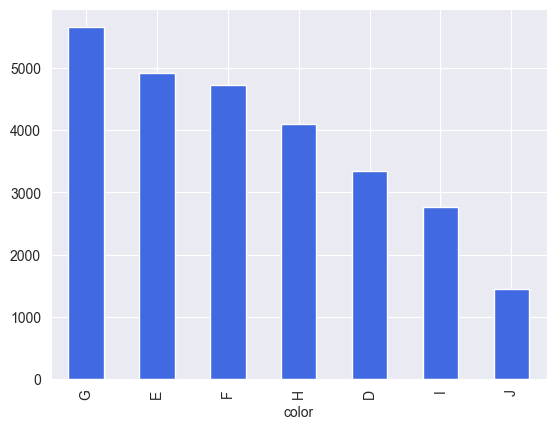

In [3]:
sns.set_style("darkgrid")
count = dataset["color"].value_counts()
count.plot(kind = "bar",color = "royalblue")

<Axes: xlabel='cut'>

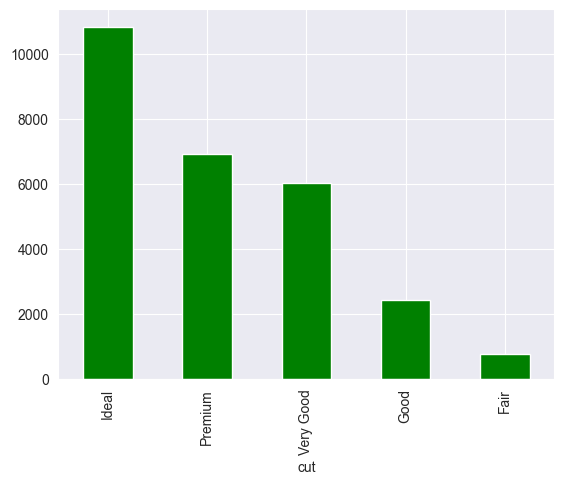

In [4]:
sns.set_style("darkgrid")
count = dataset["cut"].value_counts()
count.plot(kind = "bar",color = "green")

In [5]:
dataset.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [6]:
dataset = dataset.drop(["Unnamed: 0"],axis = 1)

In [7]:
dataset.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289


In [9]:
dataset.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [10]:
dataset.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [25]:
cat_columns = dataset.columns[dataset.dtypes == "object"]
num_columns = dataset.columns[dataset.dtypes != "object"]
cat_columns,num_columns

(Index(['cut', 'color', 'clarity'], dtype='object'),
 Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object'))

In [11]:
dataset.dropna(inplace = True)

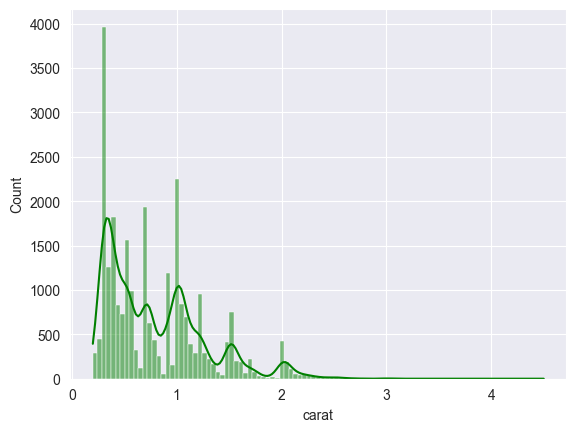

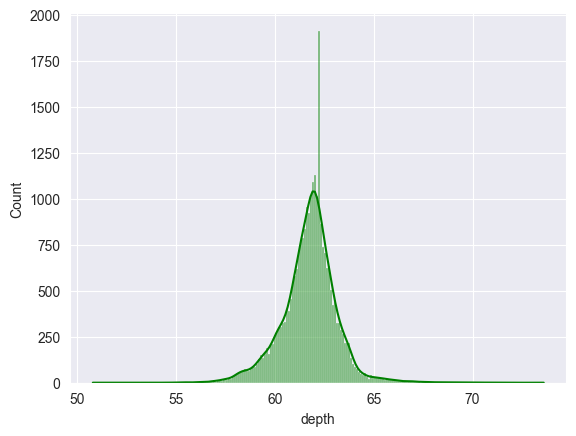

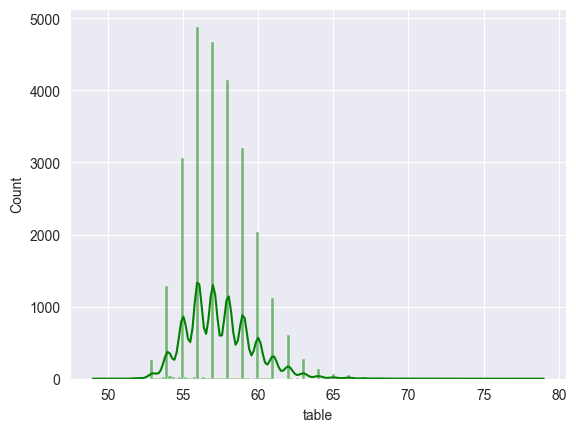

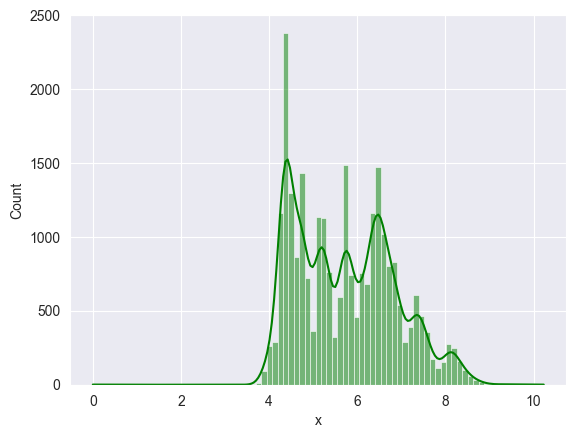

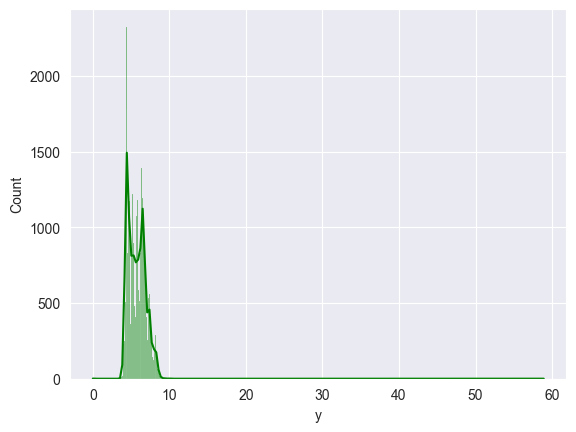

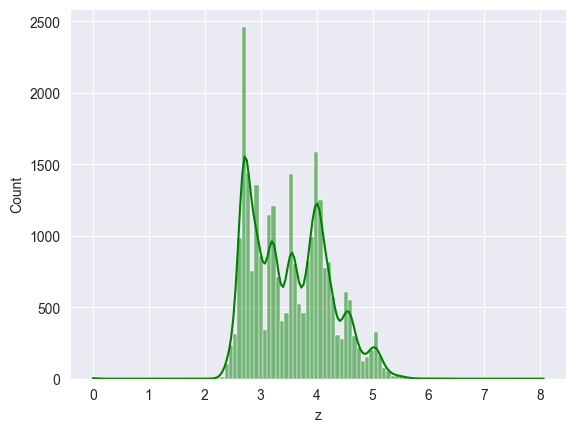

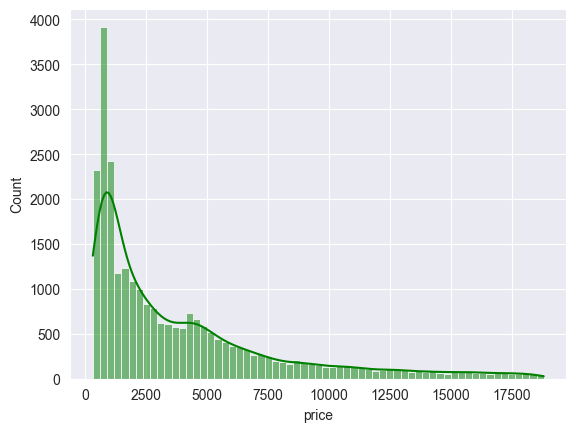

In [12]:
for col in num_columns:
    sns.histplot(data = dataset,x = col,kde = True,color = "green")
    print("\n===========================================================\n")
    plt.show()

<Axes: >

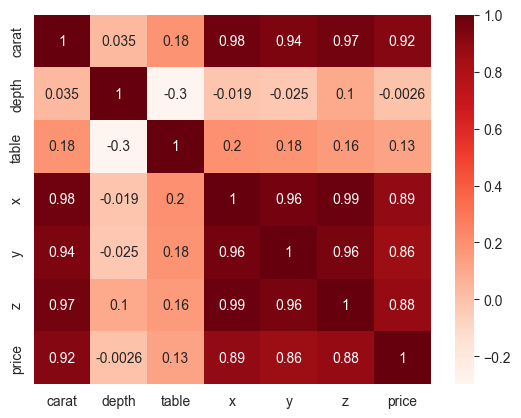

In [13]:
sns.heatmap(data=dataset[["carat", "depth", "table", "x", "y", "z", "price"]].corr(), annot=True, cmap="Reds")

In [14]:
X = dataset.drop(["price"],axis = 1)

In [15]:
Y = dataset["price"]

In [16]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [17]:
num_pipeline = Pipeline(steps = [("impute",(SimpleImputer())),
                                 ("scaler",(StandardScaler()))
                                 ]
                        )

In [18]:
cat_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))

    ]
)

In [19]:
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good',
                                             'Premium', 'Ideal'],
                                            ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
                                            ['I1', 'SI2', 'SI1', 'VS2', 'VS1',
                                             'VVS2', 'VVS1', 'IF']]))])

In [20]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [27]:
cat_columns = X.columns[X.dtypes == "object"]
num_columns = X.columns[X.dtypes != "object"]
cat_columns,num_columns

(Index(['cut', 'color', 'clarity'], dtype='object'),
 Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))

In [28]:
preprocessor = ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,num_columns),
        ("cat_pipeline",cat_pipeline,cat_columns)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]))]),
                                 Index(['cut', 'color', 'clarity'], dtype='object'))])

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42,test_size = 0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(21016, 9) (5254, 9) (21016,) (5254,)


In [30]:
x_train = pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [33]:
x_train.head(3)

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,1.129646,0.107623,-0.650305,1.211863,1.174138,1.202708,4.0,3.0,3.0
1,0.795338,-0.175368,-0.829599,0.937244,0.977840,0.931103,4.0,2.0,6.0
2,-0.207587,0.178371,1.142629,-0.010636,-0.057188,-0.012368,3.0,1.0,2.0


Linear Regression

In [36]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8194565798401241

KNN

In [40]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9632047750244369

DESCISION TREE

In [43]:
dtr = DecisionTreeRegressor(max_depth = 5,criterion = "squared_error")
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test)

0.938695373833901

In [45]:
LOG_FILE=f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"
log_path=os.path.join(os.getcwd(),"logs")
os.makedirs(log_path,exist_ok=True)
LOG_FILEPATH=os.path.join(log_path,LOG_FILE)

In [47]:
logging.basicConfig(level=logging.INFO, 
                    filename=LOG_FILEPATH,
                    format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s"
                    )

In [48]:
logging.info("this is for test")